# Le théorème central limite
Le théorème central limite est un théorème qui dit que **si on additionne un très grand nombre de variables aléatoires, quelles que soient leurs distributions, la somme sera toujours une variable de distribution normale**.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi, exp

## Répartition normale ou de Gauss

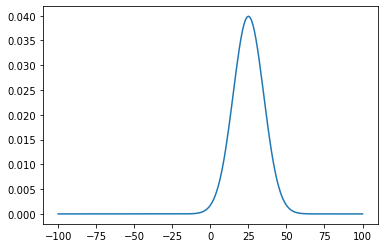

In [3]:
# On commence par tracer la loi normale afin de voir à quoi elle ressemble
# On commence par définir notre fonction f(x,mu,sigma)
f = lambda x,mu,sigma : (1/(sqrt(2*pi*pow(sigma,2))))*exp(-((pow((x-mu),2))/(2*pow(sigma,2))))

# On définit le domaine de traçage de notre fonction
domain = range(-100,101)

# On calcule nos valeurs d'ordonnées avec une moyenne et un écart type au hasard
y = [f(x, 25, 10) for x in domain]
plot = plt.plot(domain, y)

## Création de variables aléatoires avec Numpy

random_vector est de type :<class 'numpy.ndarray'> et de longueur 50


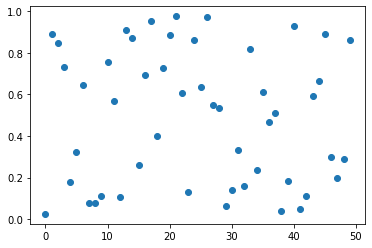

In [4]:
# On apprend ensuite à créer des nombres aléatoires avec Numpy
# Dans cet exemple nous créons un vecteur (i.e un tableau) de nombres aléatoires
random_vector = np.random.rand(50)
print("random_vector est de type :" + str(type(random_vector)) + " et de longueur " + str(len(random_vector)))
plot2 = plt.scatter(range(len(random_vector)), random_vector)

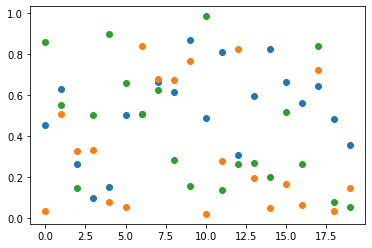

In [5]:
# On peut également créer ces nombres aléatoires sous forme de matrice en spécifiant la taille à np.random.rand()
# Pour Numpy une matrice est un tableau de tableaux
# Ici on demande par exemple un "tableau contenant 3 tableaux de 20 valeurs" soit une matrice 3x20 (60 valeurs)
random_matrix_1 = np.random.rand(3, 20)

# On affiche alors les deux matrices de valeurs aléatoires dans un même graphique
plotM1 = plt.scatter(range(len(random_matrix_1[0,:])), random_matrix_1[0,:])
plotM2 = plt.scatter(range(len(random_matrix_1[1,:])), random_matrix_1[1,:])
plotM3 = plt.scatter(range(len(random_matrix_1[2,:])), random_matrix_1[2,:])

## Somme des variables

Le tableau de sommes est de format : (500,)


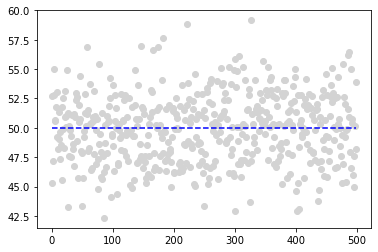

In [19]:
# Génération de nos variables aléatoires
# On génère 100 sets de 500 variables en une seule matrice et on les additionnera ensuite
random_matrix = np.random.rand(100, 500)

# On utilise la fonction sum() de Numpy pour sommer les éléments de la matrice
# Ici on ne veut pas sommer tous les éléments d'un même échantillon, mais les éléments de chaque échantillon 1 à 1
# Donc on somme en terme de colonne en précisant à np.sum() son 2e argument = 0
sums = np.sum(random_matrix, 0)

# La méthode shape() nous permet de vérifier la taille de notre tableau final (très utile !)
# Surtout en cas d'erreur "Shapes not aligned"
print("Le tableau de sommes est de format : " + str(sums.shape))

# Regardons à quoi ressemble nos set de variables
fig1 = plt.figure()
plotSums = plt.scatter(range(len(sums)), sums, color="lightgrey")
plt.plot(range(len(sums)), np.full(len(sums), 50), color="blue", linestyle="dashed")

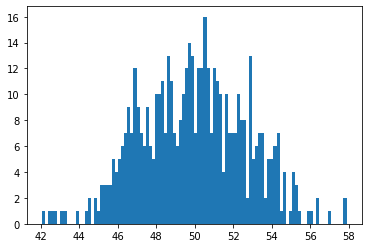

In [11]:
# La visualisation en nuage de points n'est pas représentative (même si on devine une tendance autour de 50)
# Ce qui est normal vu qu'on a sommé chaque fois 100 valeurs entre 0 et 1 on se trouve ici entre 0 et 100 en sortie
# Dans notre cas on veut plutôt afficher le nombre de valeurs sur des intervalles
# Pour cela, le diagramme en barres (histogramme) est parfait
plotBars = plt.hist(sums, bins=100)

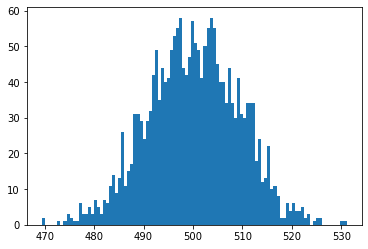

In [12]:
# On devine un début de loi normale mais on va devoir refaire ça sur un nombre de valeurs bien plus importants
random_matrix_2 = np.random.rand(1000, 2000)
sums_2 = np.sum(random_matrix_2, 0)
plotBars = plt.hist(sums_2, bins=100)

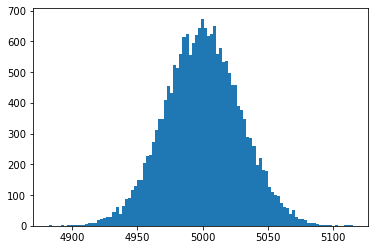

In [13]:
# Et avec beaucoup de valeurs
random_matrix_3 = np.random.rand(10000, 20000)
sums_3 = np.sum(random_matrix_3, 0)
plotBars = plt.hist(sums_3, bins=100)

In [14]:
# Finalement, Numpy nous offre des méthodes pour connaître les propriétés de la distribution que nous venons de créer
print("La moyenne empirique de notre distribution est {}."
      .format(np.mean(sums_3)))
print("La moyenne empirique de la variable générée par la fonction rand est {}."
      .format(np.mean(np.random.rand(100000))))
print("La variance sums_3 de notre distribution est {}."
      .format(np.var(sums_3)))
print("La variance empirique de la variable générée par la fonction rand est {}."
      .format(np.var(np.random.rand(100000))))

La moyenne empirique de notre distribution est 5000.004087268591.
La moyenne empirique de la variable générée par la fonction rand est 0.5000781622764179.
La variance sums_3 de notre distribution est 834.9888935018331.
La variance empirique de la variable générée par la fonction rand est 0.08285897873428213.
